# Using qv budget to diagnose ITCZ changes

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# from ipywidgets import IntProgress
from IPython.display import display
# %matplotlib inline
plt.rcParams.update({'font.size': 14})#increase font size

from functions_mpas import compute_mse_budget

In [2]:
pth='/glade/campaign/mmm/dpm/rberrios/glade_scratch/MPAS_APE/aqua_sstmax10N_ASD/'
list_of_exps = ['minus4K','CTL','plus4K'] #'minus4K'
expLabels = {
    'CTL': 'CTL',
    'plus4K' : 'plus4K',
    'minus4K':'minus4K',
    '30km' : '30 km',
    '15km' : '15 km',
    'TC_3km' : '3 km',
    'CTL/120km' : 'CTL (120 km)',
    'HOMO_RAD/120km' : 'HOMO_RAD (120 km)',
    'HOMO_RAD/120km_from_restart' : 'HOMO_RAD_rst',
    'HOMO_RAD/120km_online': 'HOMO_RAD_online'
}
nexps = len(list_of_exps)

lineColors = {
    'minus4K':'tab:blue',
    'CTL':'gray',
    'plus4K':'red',
    'CTL/120km':'black',
    'HOMO_RAD' : 'purple',
    'HOMO_RAD/120km':'red',
    'HOMO_RAD/120km_online':'tab:orange',
    'HOMO_RAD/120km_from_restart' : 'tab:blue'}

#define constants
Rearth = 6379.0e3
G = 9.81
Cp = 1004.1
Lv = 2.5e6
Rd = 287.15

### Testing water vapor budget

minus4K


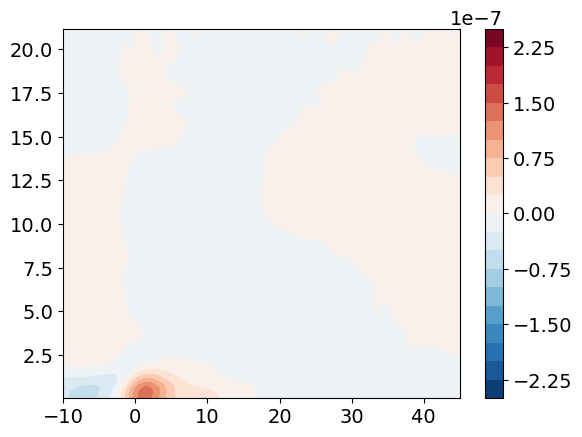

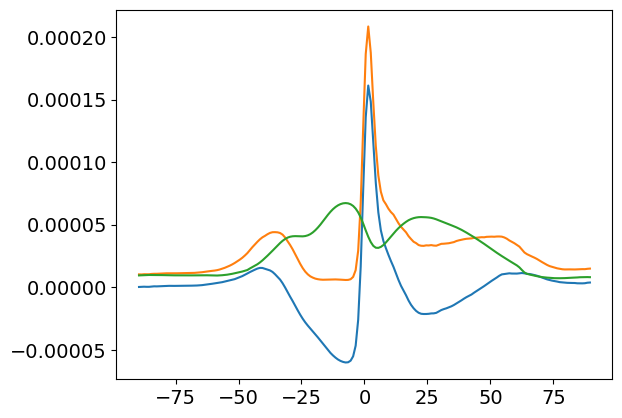

CTL


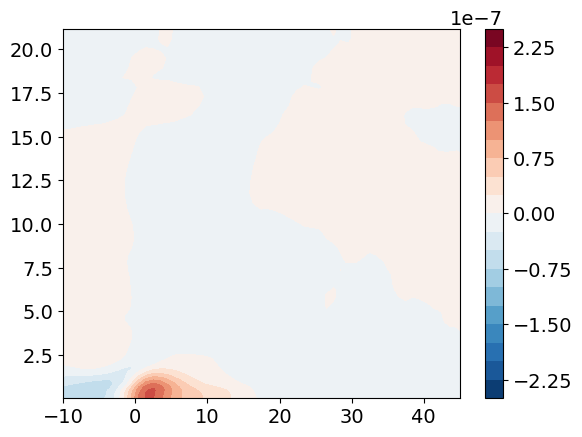

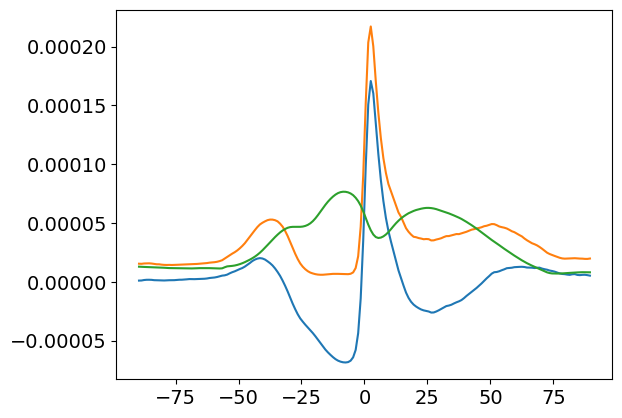

plus4K


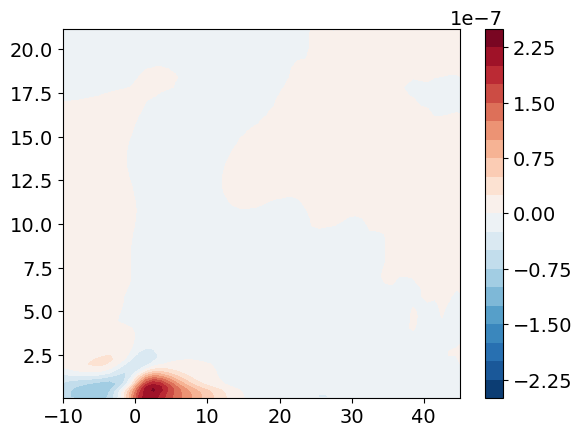

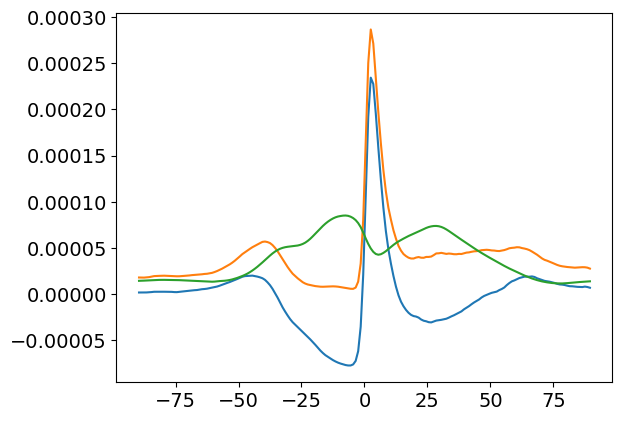

<Figure size 640x480 with 0 Axes>

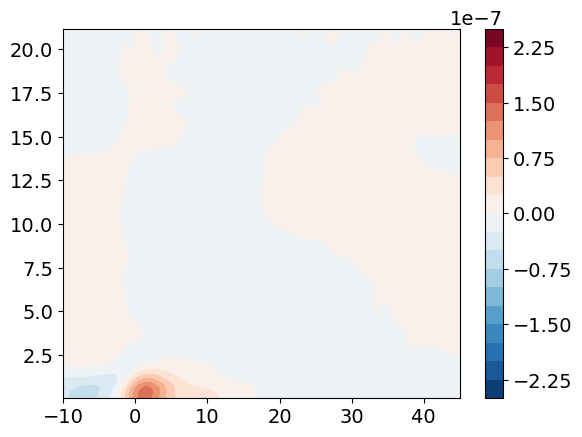

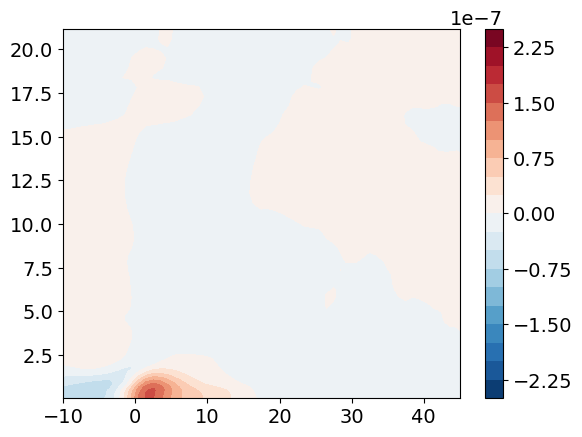

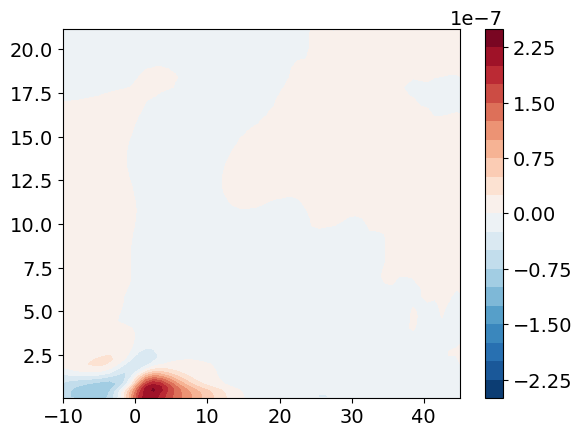

In [3]:
plt.figure()
for expName in ['minus4K','CTL','plus4K']:
    print(expName)
    fname3d=pth+expName+'/TC_3km/latlon/diags3d_global_nospinup_r360x180_extended.nc'
    ds = xr.open_dataset(fname3d)
    qv = ds.qv
    va = ds.uReconstructMeridional
    rhod = (ds.pressure/(Rd*ds.temperature)).mean('lon').mean('time')
    dz = np.gradient(ds.level)
    coslat = np.cos(np.radians(ds.lat))
    del ds

    # meridional divergence of water vapor flux
    qvFlux = (qv*va).mean('time').mean('lon')
    qvFlux_div = -np.gradient(qvFlux,np.radians(qvFlux.lat)*Rearth,axis=0)
    # vertical integration
    qvFlux_div_vint = np.trapz(qvFlux_div*rhod,qvFlux.level,axis=-1)

    fig=plt.figure()
    [X, Y] = np.meshgrid(qv.lat, qv.level*0.001)
    plt.contourf(X, Y, qvFlux_div.T, cmap='RdBu_r', levels=np.linspace(-2.5e-7,2.5e-7,21))
    plt.colorbar()
    plt.xlim([-10,45])
    display(fig)

    # surface precipitation in kg/m2/s
    fname2d=pth+expName+'/TC_3km/latlon/diags_global_nospinup_r360x180.nc'
    ds = xr.open_dataset(fname2d)
    pr = ds.pr.mean('time').mean('lon')/3600.0
    del ds

    # surface evaporation
    fname2d=pth+expName+'/TC_3km/latlon/radFluxes_r360x180.nc'
    ds = xr.open_dataset(fname2d)
    E = ds.qfx.mean('time').mean('lon')
    del ds

    # plot
    fig=plt.figure()
    plt.plot(E.lat,qvFlux_div_vint)
    plt.plot(E.lat,pr)
    plt.plot(E.lat,E)
    display(fig)
    plt.close()

(-10.0, 45.0)

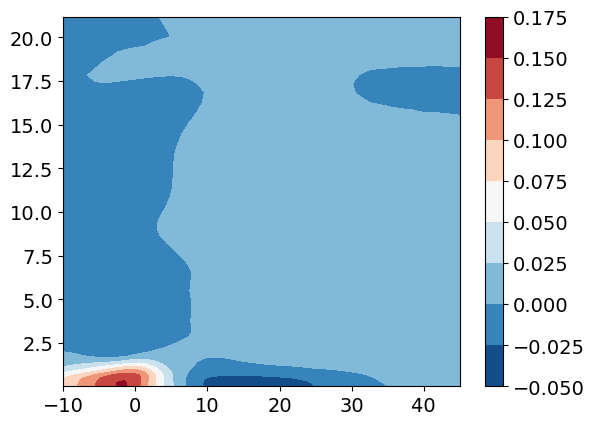

In [4]:
plt.figure()
[X, Y] = np.meshgrid(qv.lat, qv.level*0.001)
plt.contourf(X, Y, qvFlux.T, cmap='RdBu_r') #, levels=np.linspace(-2.5e-7,2.5e-7,21))
plt.colorbar()
plt.xlim([-10,45])

minus4K


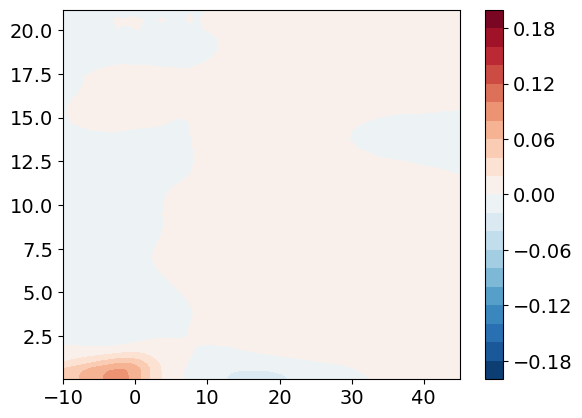

CTL


In [ ]:
fig, ax = plt.subplots(figsize=(7,3*3),nrows=3,sharex=True,constrained_layout=True)

for expName in ['minus4K','CTL','plus4K']:
    print(expName)

    fname3d=pth+expName+'/TC_3km/latlon/diags3d_global_nospinup_r360x180_extended.nc'
    ds = xr.open_dataset(fname3d)
    qv = ds.qv
    va = ds.uReconstructMeridional
    rhod = (ds.pressure/(Rd*ds.temperature)).mean('lon').mean('time')
    dz = np.gradient(ds.level)
    coslat = np.cos(np.radians(ds.lat))
    del ds

    # meridional divergence of water vapor flux
    qvFlux = (qv*va).mean('time').mean('lon')

    fig=plt.figure()
    [X, Y] = np.meshgrid(qv.lat, qv.level*0.001)
    plt.contourf(X, Y, qvFlux.T, cmap='RdBu_r',levels=np.linspace(-0.2,0.2,21))
    plt.colorbar()
    plt.xlim([-10,45])
    display(fig)
    
    qvFlux_div = -np.gradient(qvFlux,np.radians(qvFlux.lat)*Rearth,axis=0)
    # vertical integration
    qvFlux_div_vint = np.trapz(qvFlux_div*rhod,qvFlux.level,axis=-1)*86400.0
    
    # surface precipitation in kg/m2/s
    fname2d=pth+expName+'/TC_3km/latlon/diags_global_nospinup_r360x180.nc'
    ds = xr.open_dataset(fname2d)
    pr = ds.pr.mean('time').mean('lon')*24. #mm/day
    del ds

    # surface evaporation
    fname2d=pth+expName+'/TC_3km/latlon/radFluxes_r360x180.nc'
    ds = xr.open_dataset(fname2d)
    E = ds.qfx.mean('time').mean('lon')*86400.0
    del ds

    # plot
    ax[1].plot(E.lat, qvFlux_div_vint, color=lineColors[expName])
    ax[2].plot(E.lat, E, color=lineColors[expName])


# for the first panel, we plot the entire water vapor budget from one of the experiments
ax[0].plot(E.lat, pr, color=lineColors[expName])
ax[0].plot(E.lat, qvFlux_div_vint, color=lineColors[expName], linestyle='dashed')
ax[0].plot(E.lat, E, color=lineColors[expName], linestyle='dotted')
ax[0].plot(E.lat, qvFlux_div_vint+E, color='k')
ax[0].legend(['rainfall rate','moisture convergence','evaporation','total'])
ax[0].set_ylabel('moisture budget\n(mm day$^{-1}$)')

# specify y-tick marks
ax[0].grid(True)
ax[1].grid(True)
ax[-1].grid(True)
ax[-1].set_xticks([-10,0,10,20,30,40])
ax[-1].set_xticklabels(['10S','0','10N','20N','30N','40N'])
ax[-1].set_xlim([-10,45])
ax[-1].set_xlabel('latitude')
ax[1].set_ylabel('moisture convergence\n(mm day$^{-1}$)')
ax[-1].set_ylabel('evaporation\n(mm day$^{-1}$)')
# add legend
ax[1].legend(list_of_exps)

#add panel labels
for i,axis in enumerate(ax.flat):
    label = "("+chr(i+97)+")"
    axis.text(0.01, 0.98, label,
        horizontalalignment='left',
        verticalalignment='top',
        transform=axis.transAxes,
        fontsize='12', bbox=dict(facecolor='white', alpha=0.85))
plt.savefig('./Figures/lat_moisture_budget_ASD.jpeg',bbox_inches='tight',dpi=600)

Narrower and stronger ITCZ: consistent with stronger water vapor flux convergence within the ITCZ but stronger water vapor flux divergence at the edges of the ITCZ. Despite stronger evaporation, the ITCZ narrows and weakens consistent with the water vapor flux convergence/divergence. This is consistent with the changes in the Hadley cell...